In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
df=pd.read_csv('Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1946,7449-HVPIV,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.40,5099.15,No
6020,0020-JDNXP,Female,0,Yes,Yes,34,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,61.25,1993.2,No
102,7123-WQUHX,Male,0,No,No,38,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),95.00,3605.6,No
4372,4781-ZXYGU,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.15,20.15,No
5184,7570-WELNY,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),84.70,5711.05,No


In [5]:
#Drop customerID column
df.drop('customerID',axis=1,inplace=True)

In [6]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4521,Female,0,Yes,No,46,No,No phone service,DSL,Yes,Yes,No,No,Yes,No,Month-to-month,No,Electronic check,45.55,2062.15,No
3060,Male,0,Yes,No,25,No,No phone service,DSL,No,No,Yes,No,Yes,No,One year,Yes,Credit card (automatic),38.10,970.4,No
2016,Female,0,No,No,10,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,86.45,830.85,Yes
2656,Female,0,No,No,39,Yes,No,DSL,No,No,No,Yes,No,Yes,One year,No,Electronic check,59.30,2209.15,No
6675,Female,0,No,No,36,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,One year,Yes,Mailed check,70.70,2511.95,No


In [7]:
df.shape

(7043, 20)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [17]:
#Covert TotalCharges into numbers
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [21]:
#drop 11 rows where TotalCharges is blank
df=df[df.TotalCharges!=' ']

In [22]:
df.shape

(7032, 20)

In [26]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

/Users/anubhoyar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [28]:
df.TotalCharges.dtypes

dtype('float64')

In [31]:
#tenure of customer who are not leaving
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure

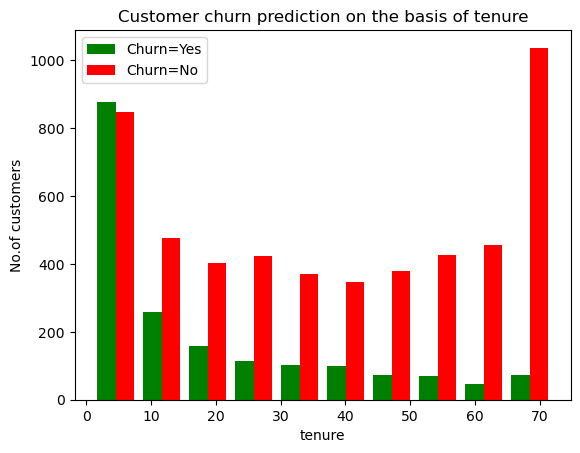

In [41]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Customer churn prediction on the basis of tenure')
plt.xlabel("tenure")
plt.ylabel("No.of customers")
plt.show()

In [39]:
mc_churn_no=df[df.Churn=='No'].MonthlyCharges
mc_churn_yes=df[df.Churn=='Yes'].MonthlyCharges

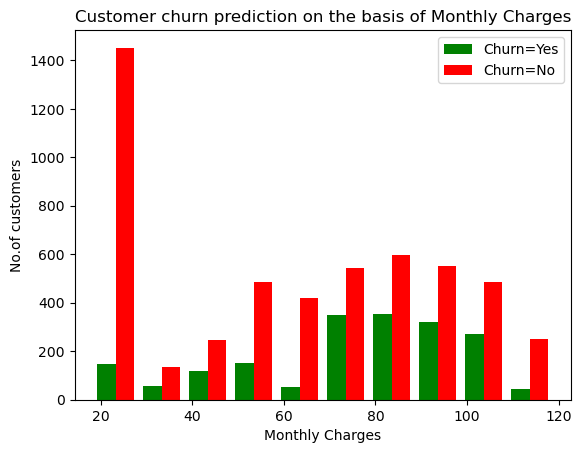

In [42]:
plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Customer churn prediction on the basis of Monthly Charges')
plt.xlabel("Monthly Charges")
plt.ylabel("No.of customers")
plt.show()

In [46]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')
    

In [47]:
unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [48]:
#replace 'No internet service' with 'No'
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

/Users/anubhoyar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [49]:
unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [50]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [54]:
#replace 'Yes' and 'No' with 1 & 0 
yes_no_columns=[ 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines',  'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [55]:
unique_col_values(df)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [56]:
for column in df:
    print(f'{column}:{df[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [57]:
#replace Female and Male values of gender with 1 and 0
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [59]:
df['gender'].unique()

array([1, 0])

In [61]:
#apply one hot encodeing for Contract,PaymentMethod,InternetService columns
df1=pd.get_dummies(data=df,columns=['Contract','PaymentMethod','InternetService'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [62]:
df1.shape

(7032, 27)

In [63]:
df1.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
2401,0,1,0,1,11,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4049,1,1,1,0,46,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [64]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year              

Scaling

In [65]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [66]:
df1.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
4235,1,1,1,0,0.774648,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
2779,0,0,0,0,0.112676,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [69]:
for column in df1:
    print(f'{column}:{df1[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [70]:
X=df1.drop('Churn',axis='columns')
y=df1['Churn']

#### Train test split

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [72]:
X_train.shape

(5625, 26)

In [74]:
X_test.shape

(1407, 26)

In [75]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
5664,1,1,0,0,0.126761,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [82]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',
             loss=('binary_crossentropy'),
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)    

Epoch 1/10
176/176 [==============================] - 0s 597us/step - loss: 0.5263 - accuracy: 0.7282
Epoch 2/10
176/176 [==============================] - 0s 567us/step - loss: 0.4339 - accuracy: 0.7938
Epoch 3/10
176/176 [==============================] - 0s 570us/step - loss: 0.4212 - accuracy: 0.7989
Epoch 4/10
176/176 [==============================] - 0s 564us/step - loss: 0.4170 - accuracy: 0.8023
Epoch 5/10
176/176 [==============================] - 0s 549us/step - loss: 0.4149 - accuracy: 0.8050
Epoch 6/10
176/176 [==============================] - 0s 563us/step - loss: 0.4131 - accuracy: 0.8066
Epoch 7/10
176/176 [==============================] - 0s 554us/step - loss: 0.4122 - accuracy: 0.8084
Epoch 8/10
176/176 [==============================] - 0s 583us/step - loss: 0.4107 - accuracy: 0.8098
Epoch 9/10
176/176 [==============================] - 0s 561us/step - loss: 0.4100 - accuracy: 0.8103
Epoch 10/10
176/176 [==============================] - 0s 570us/step - loss: 0.408

In [83]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 510us/step - loss: 0.4399 - accuracy: 0.7953


[0.43987712264060974, 0.7953091859817505]

In [84]:
prediction=model.predict(X_test)
prediction[:5]

44/44 [==============================] - 0s 419us/step


array([[0.18376493],
       [0.32048938],
       [0.01482958],
       [0.7364979 ],
       [0.5306068 ]], dtype=float32)

In [85]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [86]:
#Sigmoid gives output in range of 0-1 so create function to handle it

y_pred=[]
for pred in prediction:
    if pred>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [87]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       999
           1       0.67      0.59      0.62       408

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.80      0.79      1407



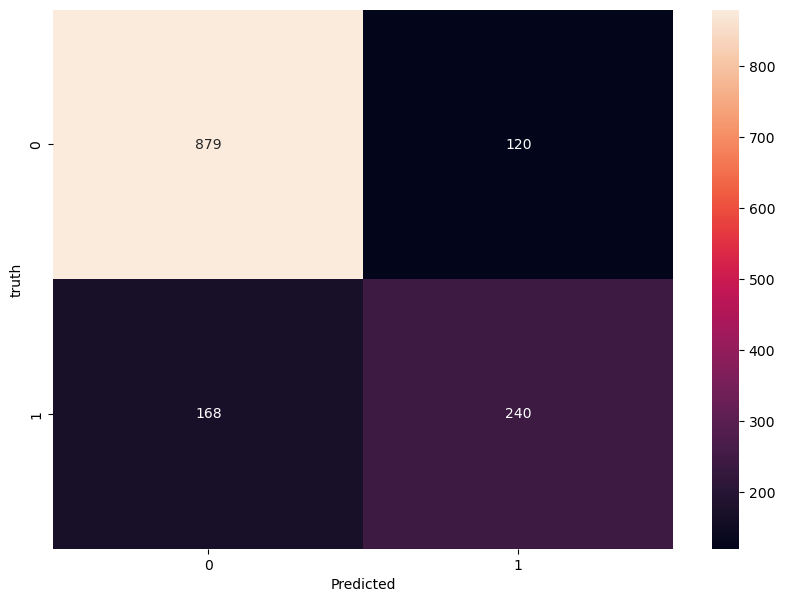

In [92]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')
plt.show()

Method 1:Performing Undersampling as Data is Imbalanced

In [95]:
#class count
count_class_0,count_class_1=df1.Churn.value_counts()

#Divide by class
df_class_0=df1[df1['Churn']==0]
df_class_1=df1[df1['Churn']==1]

In [96]:
count_class_0,count_class_1

(5163, 1869)

In [98]:
#Take samples of class_0 as same as minority class class_1
df_class_0_under=df_class_0.sample(count_class_1)

In [100]:
#combine both dataframes
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [102]:
print('Random under-sampling')
print(df_test_under['Churn'].value_counts())

Random under-sampling
0    1869
1    1869
Name: Churn, dtype: int64


In [103]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [105]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [106]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [107]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 683us/step - loss: 0.6206 - accuracy: 0.6411
Epoch 2/100
94/94 [==============================] - 0s 604us/step - loss: 0.5232 - accuracy: 0.7515
Epoch 3/100
94/94 [==============================] - 0s 581us/step - loss: 0.4993 - accuracy: 0.7605
Epoch 4/100
94/94 [==============================] - 0s 588us/step - loss: 0.4912 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 578us/step - loss: 0.4849 - accuracy: 0.7689
Epoch 6/100
94/94 [==============================] - 0s 589us/step - loss: 0.4815 - accuracy: 0.7702
Epoch 7/100
94/94 [==============================] - 0s 589us/step - loss: 0.4786 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 588us/step - loss: 0.4779 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 0s 587us/step - loss: 0.4761 - accuracy: 0.7732
Epoch 10/100
94/94 [==============================] - 0s 590us/step - loss: 0.4732 - accura

94/94 [==============================] - 0s 669us/step - loss: 0.3930 - accuracy: 0.8124
Epoch 82/100
94/94 [==============================] - 0s 671us/step - loss: 0.3916 - accuracy: 0.8161
Epoch 83/100
94/94 [==============================] - 0s 641us/step - loss: 0.3893 - accuracy: 0.8137
Epoch 84/100
94/94 [==============================] - 0s 638us/step - loss: 0.3934 - accuracy: 0.8174
Epoch 85/100
94/94 [==============================] - 0s 649us/step - loss: 0.3894 - accuracy: 0.8187
Epoch 86/100
94/94 [==============================] - 0s 619us/step - loss: 0.3878 - accuracy: 0.8154
Epoch 87/100
94/94 [==============================] - 0s 625us/step - loss: 0.3885 - accuracy: 0.8191
Epoch 88/100
94/94 [==============================] - 0s 594us/step - loss: 0.3863 - accuracy: 0.8191
Epoch 89/100
94/94 [==============================] - 0s 699us/step - loss: 0.3875 - accuracy: 0.8147
Epoch 90/100
94/94 [==============================] - 0s 866us/step - loss: 0.3864 - accuracy: 

We see above that Precision and Recall are impoved

Method2 :Performing Oversampling 

In [109]:
count_class_0,count_class_1

(5163, 1869)

In [110]:
df_class1_over=df_class_1.sample(count_class_0,replace=True)

In [111]:
df_test_over=pd.concat([df_class_0,df_class1_over],axis=0)
df_test_over.shape

(10326, 27)

In [113]:
print('Random over-sampling')
print(df_test_over['Churn'].value_counts())

Random over-sampling
0    5163
1    5163
Name: Churn, dtype: int64


In [114]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [116]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [117]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 630us/step - loss: 0.5815 - accuracy: 0.6717
Epoch 2/100
259/259 [==============================] - 0s 588us/step - loss: 0.4898 - accuracy: 0.7611
Epoch 3/100
259/259 [==============================] - 0s 578us/step - loss: 0.4812 - accuracy: 0.7643
Epoch 4/100
259/259 [==============================] - 0s 583us/step - loss: 0.4771 - accuracy: 0.7662
Epoch 5/100
259/259 [==============================] - 0s 622us/step - loss: 0.4730 - accuracy: 0.7699
Epoch 6/100
259/259 [==============================] - 0s 579us/step - loss: 0.4702 - accuracy: 0.7702
Epoch 7/100
259/259 [==============================] - 0s 594us/step - loss: 0.4681 - accuracy: 0.7711
Epoch 8/100
259/259 [==============================] - 0s 629us/step - loss: 0.4655 - accuracy: 0.7731
Epoch 9/100
259/259 [==============================] - 0s 600us/step - loss: 0.4618 - accuracy: 0.7751
Epoch 10/100
259/259 [==============================] - 0s 582us/step - l

259/259 [==============================] - 0s 595us/step - loss: 0.3804 - accuracy: 0.8246
Epoch 80/100
259/259 [==============================] - 0s 595us/step - loss: 0.3807 - accuracy: 0.8219
Epoch 81/100
259/259 [==============================] - 0s 572us/step - loss: 0.3796 - accuracy: 0.8228
Epoch 82/100
259/259 [==============================] - 0s 576us/step - loss: 0.3781 - accuracy: 0.8251
Epoch 83/100
259/259 [==============================] - 0s 574us/step - loss: 0.3771 - accuracy: 0.8262
Epoch 84/100
259/259 [==============================] - 0s 577us/step - loss: 0.3772 - accuracy: 0.8289
Epoch 85/100
259/259 [==============================] - 0s 575us/step - loss: 0.3750 - accuracy: 0.8253
Epoch 86/100
259/259 [==============================] - 0s 583us/step - loss: 0.3751 - accuracy: 0.8254
Epoch 87/100
259/259 [==============================] - 0s 590us/step - loss: 0.3740 - accuracy: 0.8248
Epoch 88/100
259/259 [==============================] - 0s 573us/step - loss:

Method3: SMOTE

In [118]:
#Take original dataframe
X=df1.drop('Churn',axis='columns')
y=df1['Churn']

In [119]:
#pip install imbalanced-Learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 1.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [123]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [122]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [125]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [126]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [127]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 610us/step - loss: 0.5482 - accuracy: 0.7145
Epoch 2/100
259/259 [==============================] - 0s 584us/step - loss: 0.4770 - accuracy: 0.7712
Epoch 3/100
259/259 [==============================] - 0s 574us/step - loss: 0.4681 - accuracy: 0.7777
Epoch 4/100
259/259 [==============================] - 0s 574us/step - loss: 0.4601 - accuracy: 0.7823
Epoch 5/100
259/259 [==============================] - 0s 581us/step - loss: 0.4536 - accuracy: 0.7872
Epoch 6/100
259/259 [==============================] - 0s 602us/step - loss: 0.4491 - accuracy: 0.7864
Epoch 7/100
259/259 [==============================] - 0s 597us/step - loss: 0.4434 - accuracy: 0.7909
Epoch 8/100
259/259 [==============================] - 0s 574us/step - loss: 0.4385 - accuracy: 0.7935
Epoch 9/100
259/259 [==============================] - 0s 579us/step - loss: 0.4348 - accuracy: 0.7975
Epoch 10/100
259/259 [==============================] - 0s 577us/step - l

259/259 [==============================] - 0s 591us/step - loss: 0.3435 - accuracy: 0.8484
Epoch 80/100
259/259 [==============================] - 0s 576us/step - loss: 0.3406 - accuracy: 0.8494
Epoch 81/100
259/259 [==============================] - 0s 588us/step - loss: 0.3378 - accuracy: 0.8511
Epoch 82/100
259/259 [==============================] - 0s 582us/step - loss: 0.3377 - accuracy: 0.8510
Epoch 83/100
259/259 [==============================] - 0s 637us/step - loss: 0.3380 - accuracy: 0.8522
Epoch 84/100
259/259 [==============================] - 0s 568us/step - loss: 0.3342 - accuracy: 0.8505
Epoch 85/100
259/259 [==============================] - 0s 565us/step - loss: 0.3392 - accuracy: 0.8501
Epoch 86/100
259/259 [==============================] - 0s 568us/step - loss: 0.3350 - accuracy: 0.8541
Epoch 87/100
259/259 [==============================] - 0s 568us/step - loss: 0.3369 - accuracy: 0.8512
Epoch 88/100
259/259 [==============================] - 0s 567us/step - loss:

Method4: Ensemble with undersampling

In [128]:
#Take original dataframe
X=df1.drop('Churn',axis='columns')
y=df1['Churn']

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [130]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [132]:
df2=X_train.copy()
df2['Churn']=y_train

In [134]:
df2_class0=df2[df2.Churn==0]
df2_class1=df2[df2.Churn==1]

In [135]:
df2_class0.shape,df2_class1.shape

((4130, 27), (1495, 27))

In [136]:
#Major class is class0 so divide it in batch of 1495
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train.Churn
    
    return X_train,y_train


In [137]:
X_train,y_train=get_train_batch(df2_class0,df2_class1,0,1495)
X_train.shape

(2990, 26)

In [139]:
y_pred1=ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 672us/step - loss: 0.6239 - accuracy: 0.6645
Epoch 2/100
94/94 [==============================] - 0s 588us/step - loss: 0.5314 - accuracy: 0.7441
Epoch 3/100
94/94 [==============================] - 0s 619us/step - loss: 0.5140 - accuracy: 0.7508
Epoch 4/100
94/94 [==============================] - 0s 594us/step - loss: 0.5068 - accuracy: 0.7575
Epoch 5/100
94/94 [==============================] - 0s 601us/step - loss: 0.5020 - accuracy: 0.7535
Epoch 6/100
94/94 [==============================] - 0s 602us/step - loss: 0.4999 - accuracy: 0.7622
Epoch 7/100
94/94 [==============================] - 0s 630us/step - loss: 0.4953 - accuracy: 0.7592
Epoch 8/100
94/94 [==============================] - 0s 642us/step - loss: 0.4940 - accuracy: 0.7595
Epoch 9/100
94/94 [==============================] - 0s 637us/step - loss: 0.4924 - accuracy: 0.7602
Epoch 10/100
94/94 [==============================] - 0s 650us/step - loss: 0.4897 - accura

94/94 [==============================] - 0s 608us/step - loss: 0.4083 - accuracy: 0.8107
Epoch 82/100
94/94 [==============================] - 0s 594us/step - loss: 0.4092 - accuracy: 0.8117
Epoch 83/100
94/94 [==============================] - 0s 577us/step - loss: 0.4081 - accuracy: 0.8147
Epoch 84/100
94/94 [==============================] - 0s 579us/step - loss: 0.4087 - accuracy: 0.8110
Epoch 85/100
94/94 [==============================] - 0s 576us/step - loss: 0.4062 - accuracy: 0.8104
Epoch 86/100
94/94 [==============================] - 0s 576us/step - loss: 0.4064 - accuracy: 0.8174
Epoch 87/100
94/94 [==============================] - 0s 577us/step - loss: 0.4040 - accuracy: 0.8171
Epoch 88/100
94/94 [==============================] - 0s 578us/step - loss: 0.4050 - accuracy: 0.8147
Epoch 89/100
94/94 [==============================] - 0s 582us/step - loss: 0.4032 - accuracy: 0.8154
Epoch 90/100
94/94 [==============================] - 0s 575us/step - loss: 0.4046 - accuracy: 

In [140]:
X_train,y_train=get_train_batch(df2_class0,df2_class1,1495,2990)
y_pred2=ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 693us/step - loss: 0.6496 - accuracy: 0.6127
Epoch 2/100
94/94 [==============================] - 0s 617us/step - loss: 0.5336 - accuracy: 0.7508
Epoch 3/100
94/94 [==============================] - 0s 606us/step - loss: 0.4995 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 0s 592us/step - loss: 0.4926 - accuracy: 0.7585
Epoch 5/100
94/94 [==============================] - 0s 618us/step - loss: 0.4878 - accuracy: 0.7605
Epoch 6/100
94/94 [==============================] - 0s 613us/step - loss: 0.4845 - accuracy: 0.7619
Epoch 7/100
94/94 [==============================] - 0s 602us/step - loss: 0.4823 - accuracy: 0.7629
Epoch 8/100
94/94 [==============================] - 0s 616us/step - loss: 0.4786 - accuracy: 0.7645
Epoch 9/100
94/94 [==============================] - 0s 609us/step - loss: 0.4762 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 611us/step - loss: 0.4753 - accura

94/94 [==============================] - 0s 592us/step - loss: 0.3971 - accuracy: 0.8154
Epoch 82/100
94/94 [==============================] - 0s 617us/step - loss: 0.3964 - accuracy: 0.8184
Epoch 83/100
94/94 [==============================] - 0s 584us/step - loss: 0.3966 - accuracy: 0.8177
Epoch 84/100
94/94 [==============================] - 0s 588us/step - loss: 0.3956 - accuracy: 0.8197
Epoch 85/100
94/94 [==============================] - 0s 583us/step - loss: 0.3949 - accuracy: 0.8184
Epoch 86/100
94/94 [==============================] - 0s 579us/step - loss: 0.3946 - accuracy: 0.8171
Epoch 87/100
94/94 [==============================] - 0s 602us/step - loss: 0.3952 - accuracy: 0.8151
Epoch 88/100
94/94 [==============================] - 0s 622us/step - loss: 0.3923 - accuracy: 0.8154
Epoch 89/100
94/94 [==============================] - 0s 662us/step - loss: 0.3923 - accuracy: 0.8207
Epoch 90/100
94/94 [==============================] - 0s 709us/step - loss: 0.3910 - accuracy: 

In [141]:
X_train,y_train=get_train_batch(df2_class0,df2_class1,2990,4130)
y_pred3=ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 700us/step - loss: 0.6228 - accuracy: 0.6539
Epoch 2/100
83/83 [==============================] - 0s 622us/step - loss: 0.5182 - accuracy: 0.7677
Epoch 3/100
83/83 [==============================] - 0s 609us/step - loss: 0.4886 - accuracy: 0.7769
Epoch 4/100
83/83 [==============================] - 0s 597us/step - loss: 0.4786 - accuracy: 0.7776
Epoch 5/100
83/83 [==============================] - 0s 603us/step - loss: 0.4742 - accuracy: 0.7746
Epoch 6/100
83/83 [==============================] - 0s 604us/step - loss: 0.4718 - accuracy: 0.7776
Epoch 7/100
83/83 [==============================] - 0s 603us/step - loss: 0.4707 - accuracy: 0.7810
Epoch 8/100
83/83 [==============================] - 0s 604us/step - loss: 0.4664 - accuracy: 0.7829
Epoch 9/100
83/83 [==============================] - 0s 608us/step - loss: 0.4634 - accuracy: 0.7822
Epoch 10/100
83/83 [==============================] - 0s 603us/step - loss: 0.4609 - accura

83/83 [==============================] - 0s 583us/step - loss: 0.3929 - accuracy: 0.8186
Epoch 82/100
83/83 [==============================] - 0s 597us/step - loss: 0.3921 - accuracy: 0.8152
Epoch 83/100
83/83 [==============================] - 0s 581us/step - loss: 0.3918 - accuracy: 0.8220
Epoch 84/100
83/83 [==============================] - 0s 570us/step - loss: 0.3887 - accuracy: 0.8194
Epoch 85/100
83/83 [==============================] - 0s 571us/step - loss: 0.3871 - accuracy: 0.8254
Epoch 86/100
83/83 [==============================] - 0s 573us/step - loss: 0.3864 - accuracy: 0.8209
Epoch 87/100
83/83 [==============================] - 0s 589us/step - loss: 0.3858 - accuracy: 0.8239
Epoch 88/100
83/83 [==============================] - 0s 578us/step - loss: 0.3851 - accuracy: 0.8239
Epoch 89/100
83/83 [==============================] - 0s 573us/step - loss: 0.3844 - accuracy: 0.8216
Epoch 90/100
83/83 [==============================] - 0s 570us/step - loss: 0.3833 - accuracy: 

In [145]:
#perform voting
y_pred_final=y_pred.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0
        

In [146]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407



SMOTE worked best here!!!